Hi Veda, I ran DESeq2 using this tutorial:

https://lashlock.github.io/compbio/R_presentation.html

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Bioconductor version 3.12 (BiocManager 1.30.10), R 4.0.3 (2020-10-10)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bit’, ‘bitops’, ‘bit64’, ‘memoise’, ‘plogr’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘XML’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'backports', 'cli', 'codetools', 'colorspace', 'cpp11',
  'data.table', 'htmlwidgets', 'isoband', 'jsonlite', 'lubridate', 'magrittr',
  'nlme', 'pillar', 'processx', 'ps', 'quantmod', 'Rcpp', 'recipes', 'rlang',
  'rprojroot', 'rstudioa

In [1]:
library( "DESeq2" )
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

In [2]:
countData <- read.csv('./counts.csv', header = TRUE, sep = " ", row.names=NULL)
countData = subset(countData, select = -c(GENE) )
head(countData)

,row.names,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003.13,2974,5327,4250,9596,5499,3319,5235,3835,4277,5916,612,453,703,547,414
2,ENSG00000000005.5,847,6,8,53,14,19,5,6,23,35,8,5,5,9,0
3,ENSG00000000419.11,2483,1453,1352,1499,1137,914,1202,955,1333,1740,992,930,974,1077,795
4,ENSG00000000457.12,506,800,634,586,651,462,581,585,671,358,617,495,760,592,633
5,ENSG00000000460.15,374,748,300,401,500,232,306,237,480,279,88,74,100,109,161
6,ENSG00000000938.11,1177,185,307,251,1147,1038,632,317,983,737,230,456,265,296,172


In [4]:
metaData <- read.csv("../../project/metadata.csv", header=TRUE, sep="\t")
head(metaData)

,id,patient
,<chr>,<chr>
1,A,cancer
2,B,cancer
3,C,cancer
4,D,cancer
5,E,cancer
6,F,cancer


Make DESeq data object

In [5]:
dds <- DESeqDataSetFromMatrix(countData=countData, 
                              colData=metaData, 
                              design=~patient, tidy = TRUE)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [6]:
dds

class: DESeqDataSet 
dim: 60483 15 
metadata(1): version
assays(1): counts
rownames(60483): ENSG00000000003.13 ENSG00000000005.5 ...
  ENSGR0000280767.1 ENSGR0000281849.1
rowData names(0):
colnames(15): A B ... N O
colData names(2): id patient

In [7]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 976 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [8]:
res <- results(dds)
head(results(dds, tidy=TRUE)) #let's look at the results table

,row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003.13,3742.09191,-3.2935704,0.3572127,-9.2201937,2.965639e-20,4.154950e-18
2,ENSG00000000005.5,15.20049,-1.9033424,0.7321350,-2.5997149,9.330125e-03,2.785303e-02
3,ENSG00000000419.11,1306.93908,-0.6235487,0.3245617,-1.9212023,5.470621e-02,1.181166e-01
4,ENSG00000000457.12,603.02136,0.0722749,0.2384573,0.3030937,7.618184e-01,8.397969e-01
5,ENSG00000000460.15,306.08214,-1.8952007,0.3824161,-4.9558598,7.201112e-07,7.226113e-06
6,ENSG00000000938.11,538.41104,-1.2041190,0.4416201,-2.7265946,6.399162e-03,2.027920e-02


In [13]:
write.csv(res, "deseq2_results.csv")

In [14]:
summary(res) #summary of results


out of 49101 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 7351, 15%
LFC < 0 (down)     : 8974, 18%
outliers [1]       : 169, 0.34%
low counts [2]     : 12234, 25%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [15]:
res <- res[order(res$padj),]
head(res)

log2 fold change (MLE): patient normal vs cancer 
Wald test p-value: patient normal vs cancer 
DataFrame with 6 rows and 6 columns
                   baseMean log2FoldChange     lfcSE      stat      pvalue
                  <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000213553.4  1646.794       -6.38359  0.374046  -17.0663 2.64230e-65
ENSG00000181104.6  2963.938       -4.60792  0.275648  -16.7167 9.91253e-63
ENSG00000224861.1   208.653       -4.79258  0.302110  -15.8637 1.13081e-56
ENSG00000198944.5  1555.586        5.00812  0.318763   15.7111 1.26945e-55
ENSG00000169213.6  1350.561        5.56284  0.364767   15.2504 1.63660e-52
ENSG00000213763.4   168.127       -4.73952  0.316781  -14.9615 1.31032e-50
                         padj
                    <numeric>
ENSG00000213553.4 9.69908e-61
ENSG00000181104.6 1.81930e-58
ENSG00000224861.1 1.38362e-52
ENSG00000198944.5 1.16495e-51
ENSG00000169213.6 1.20149e-48
ENSG00000213763.4 8.01630e-47

In [16]:
write.csv(res, "results_sorted_by_pval_adjusted.csv")

### plotCounts

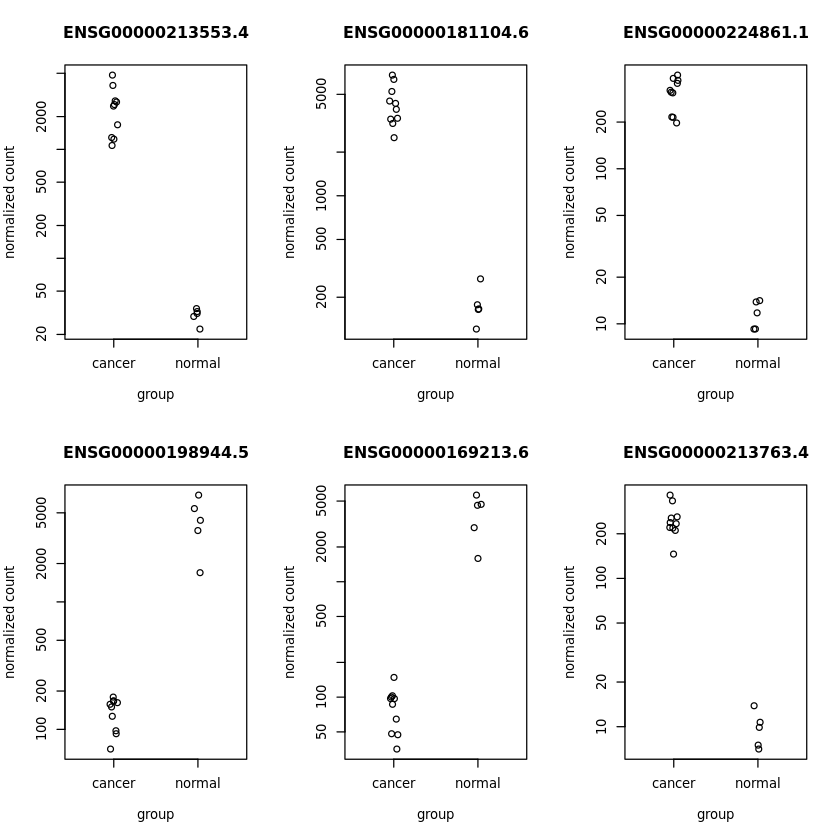

In [17]:
#we can use plotCounts fxn to compare the normalized counts
#between treated and control groups for our top 6 genes
par(mfrow=c(2,3))

plotCounts(dds, gene="ENSG00000213553.4", intgroup="patient")
plotCounts(dds, gene="ENSG00000181104.6", intgroup="patient")
plotCounts(dds, gene="ENSG00000224861.1", intgroup="patient")
plotCounts(dds, gene="ENSG00000198944.5", intgroup="patient")
plotCounts(dds, gene="ENSG00000169213.6", intgroup="patient")
plotCounts(dds, gene="ENSG00000213763.4", intgroup="patient")

### Make a volcano plot

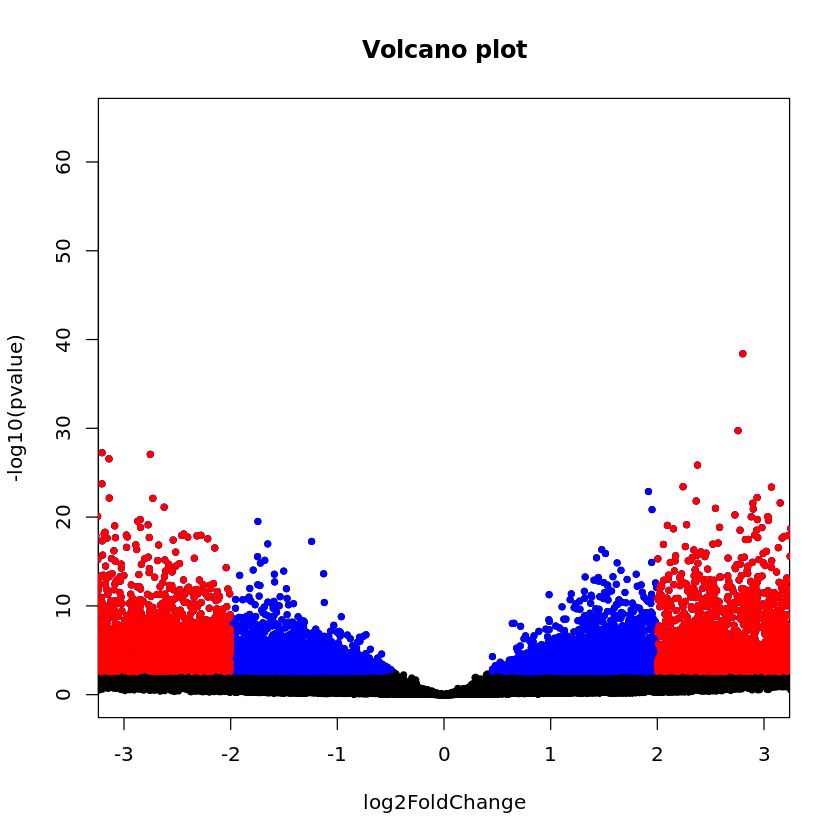

In [18]:
#reset par
par(mfrow=c(1,1))
# Make a basic volcano plot
with(res, plot(log2FoldChange, -log10(pvalue), pch=20, main="Volcano plot", xlim=c(-3,3)))

# Add colored points: blue if padj<0.01, red if log2FC>1 and padj<0.05)
with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=20, col="blue"))
with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=20, col="red"))

In [19]:
#First we need to transform the raw count data
#vst function will perform variance stabilizing transformation

vsdata <- vst(dds, blind=FALSE)

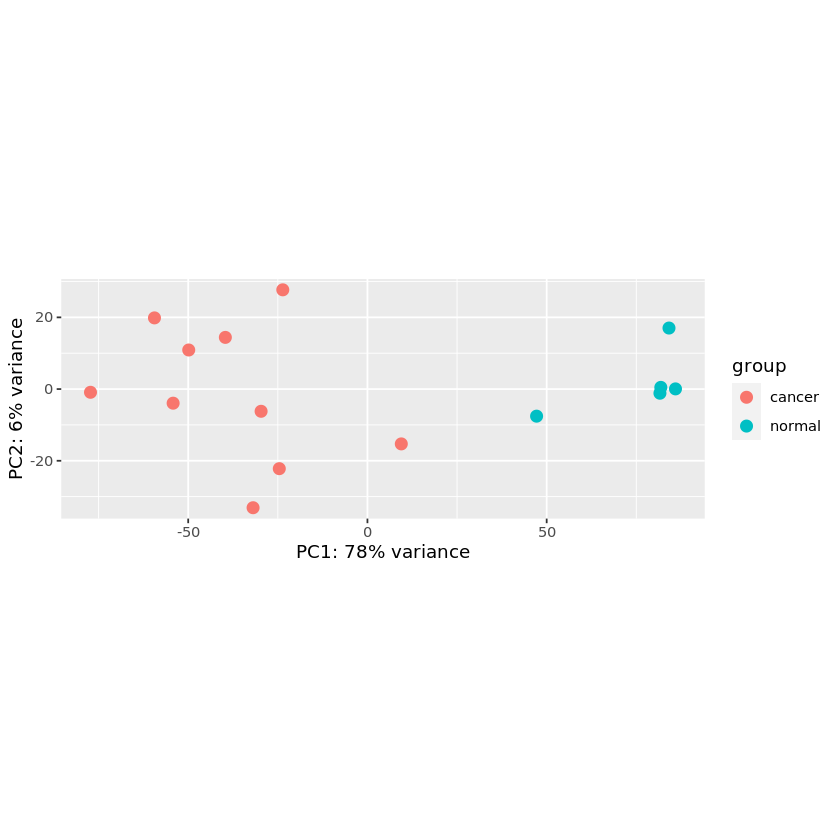

In [20]:
plotPCA(vsdata, intgroup="patient") #using the DESEQ2 plotPCA fxn we can